In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('5vol-coal-phenolic.csv')

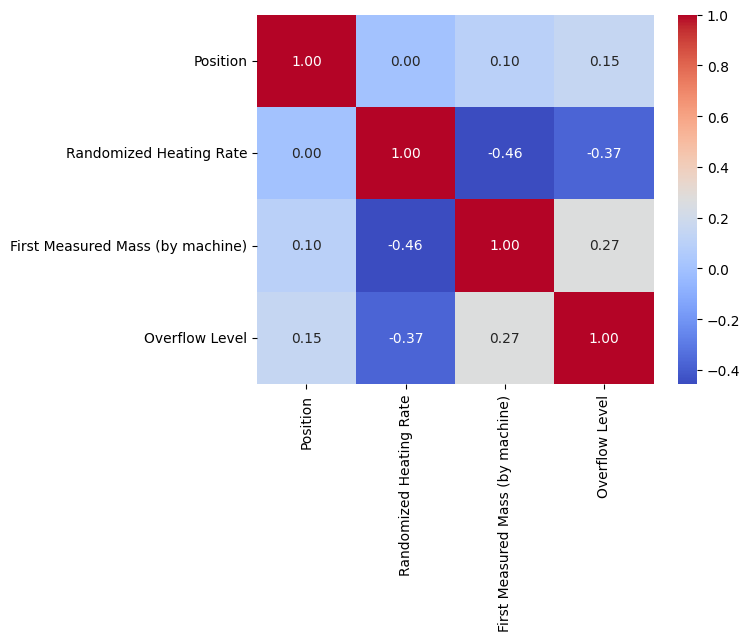

In [2]:
# map overflow strings to levels for correlation
overflow_levels = {"no": 0, "little": 1, "lots": 2}
df["Overflow Level"] = df["Amount of overflow? (lots, little, none)"].str.lower().map(overflow_levels)

# the position refers to the position on the machine -- subtract 119 to normalize to 1-12
df["Position"] = df["Position (order)"] - 119

# correlation matrix of the variables
correlation_matrix = df[
[
    "Position", 
    "Randomized Heating Rate",
    "First Measured Mass (by machine)",
    "Overflow Level"
]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

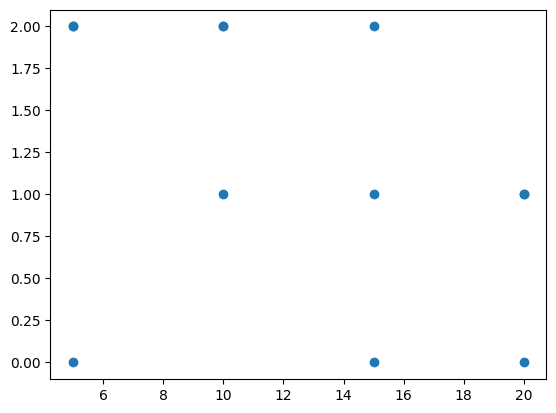

In [3]:
### seems like the strongest correlation is the heating rate... plot this

heating_rate = df["Randomized Heating Rate"]
overflow = df["Overflow Level"]

plt.scatter(heating_rate, overflow)
plt.show()

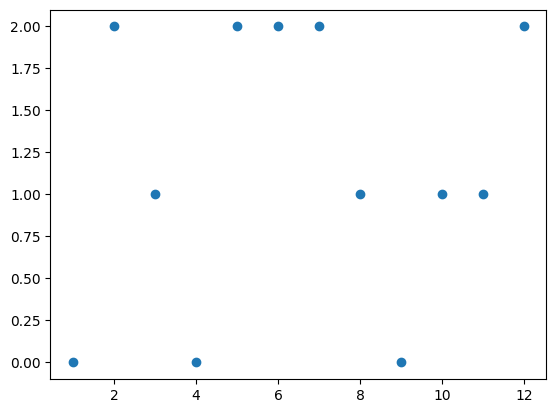

In [4]:
# perhaps it has something to do with the position?
# since position corresponds to when samples made, perhaps having them sit out will change overflow?

position = df["Position"]

plt.scatter(position, overflow)
plt.show()

To me, these graphs are as good as random. My conclusion is that the amount of overflow is random, for the purposes of DSC experiments at this scale.

A more conclusive testing procedure would likely require testing with larger volume of phenolic and also more methodically measuring expansion. We will worry more about the overflow problem when we move to creating larger samples.
